In [1]:
import os
os.chdir('../')

In [2]:
import seml
import pandas as pd
import numpy as np
#from run_seml import run
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)

/nfs/homedirs/geisler/code/seml/seml/database.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from notebooks import mpl_latex
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
mpl_latex.enable_production_mode()

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [7]:
df_experiments = seml.get_results('kdd21_rgnn_at_scale_local_attack',
                                  to_data_frame=True,
                                  fields=['batch_id', 'slurm', 'config', 'result'])

df_experiments.columns

/nfs/homedirs/geisler/code/seml/seml/evaluation.py:49: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


Index(['_id', 'batch_id', 'slurm.experiments_per_job',
       'slurm.sbatch_options.gres', 'slurm.sbatch_options.mem',
       'slurm.sbatch_options.cpus-per-task', 'slurm.sbatch_options.time',
       'slurm.sbatch_options.nodes', 'slurm.sbatch_options.job-name',
       'slurm.sbatch_options.array', 'slurm.sbatch_options.output',
       'slurm.array_id', 'slurm.task_id', 'config.overwrite',
       'config.db_collection', 'config.dataset', 'config.attack',
       'config.attack_params.lr_factor',
       'config.attack_params.search_space_size',
       'config.attack_params.ppr_recalc_at_end',
       'config.attack_params.artifact_dir',
       'config.attack_params.model_storage_type',
       'config.attack_params.surrogate_model_params.label',
       'config.attack_params.surrogate_model_params.dataset',
       'config.attack_params.surrogate_model_params.binary_attr',
       'config.attack_params.surrogate_model_params.seed', 'config.nodes',
       'config.epsilons', 'config.binary_attr

In [8]:
df_experiments = df_experiments[
    (df_experiments['config.attack'] == 'Nettack')
    & (df_experiments['config.model_label'] == 'Vanilla GCN')
    & (df_experiments['config.dataset'] == 'cora_ml')
    & df_experiments['config.nodes'].apply(lambda nodes: nodes != [1812, 389, 1588, 295, 1868, 816, 340, 2325, 2170, 2302])
]
df_experiments['config.attack_params.direct'] = df_experiments['config.attack_params.direct'].fillna(True)
df_experiments.head()

,_id,batch_id,slurm.experiments_per_job,slurm.sbatch_options.gres,slurm.sbatch_options.mem,slurm.sbatch_options.cpus-per-task,slurm.sbatch_options.time,slurm.sbatch_options.nodes,slurm.sbatch_options.job-name,slurm.sbatch_options.array,slurm.sbatch_options.output,slurm.array_id,slurm.task_id,config.overwrite,config.db_collection,config.dataset,config.attack,config.attack_params.lr_factor,config.attack_params.search_space_size,config.attack_params.ppr_recalc_at_end,config.attack_params.artifact_dir,config.attack_params.model_storage_type,config.attack_params.surrogate_model_params.label,config.attack_params.surrogate_model_params.dataset,config.attack_params.surrogate_model_params.binary_attr,config.attack_params.surrogate_model_params.seed,config.nodes,config.epsilons,config.binary_attr,config.seed,config.artifact_dir,config.model_storage_type,config.device,config.display_steps,config.model_label,config.make_undirected,config.make_unweighted,config.data_dir,config.data_device,result.results,slurm.sbatch_options.qos,config.attack_params.epochs,config.attack_params.fine_tune_epochs,config.attack_params.direct
412,529,29,1,gpu:1,16G,4,0-08:00,1,kdd21_rgnn_at_scale_local_attack_29,0-14,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6302473.0,0.0,529,kdd21_rgnn_at_scale_local_attack,cora_ml,Nettack,0.05,10000,False,cache,nettack_cora,Linear GCN,cora_ml,False,0,"[2259, 1787, 1254, 1063, 84, 264, 1933, 1159, ...","[0.5, 0.75, 1]",False,0,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,pretrained,0,20,Vanilla GCN,True,True,./datasets,0,"[{'label': 'Vanilla GCN', 'epsilon': 0.5, 'n_p...",NaN,NaN,NaN,True
413,530,29,1,gpu:1,16G,4,0-08:00,1,kdd21_rgnn_at_scale_local_attack_29,0-14,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6302473.0,1.0,530,kdd21_rgnn_at_scale_local_attack,cora_ml,Nettack,0.05,10000,False,cache,nettack_cora,Linear GCN,cora_ml,False,0,"[1867, 798, 1449, 1794, 2403, 1940, 2352, 618,...","[0.5, 0.75, 1]",False,0,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,pretrained,0,20,Vanilla GCN,True,True,./datasets,0,"[{'label': 'Vanilla GCN', 'epsilon': 0.5, 'n_p...",NaN,NaN,NaN,True
414,531,29,1,gpu:1,16G,4,0-08:00,1,kdd21_rgnn_at_scale_local_attack_29,0-14,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6302473.0,2.0,531,kdd21_rgnn_at_scale_local_attack,cora_ml,Nettack,0.05,10000,False,cache,nettack_cora,Linear GCN,cora_ml,False,0,"[454, 45, 1880, 1382, 945, 1480, 1949, 238, 10...","[0.5, 0.75, 1]",False,0,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,pretrained,0,20,Vanilla GCN,True,True,./datasets,0,"[{'label': 'Vanilla GCN', 'epsilon': 0.5, 'n_p...",NaN,NaN,NaN,True
415,532,29,1,gpu:1,16G,4,0-08:00,1,kdd21_rgnn_at_scale_local_attack_29,0-14,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6302473.0,3.0,532,kdd21_rgnn_at_scale_local_attack,cora_ml,Nettack,0.05,10000,False,cache,nettack_cora,Linear GCN,cora_ml,False,0,"[46, 1279, 1681, 2350, 2353, 945, 1205, 2302, ...","[0.5, 0.75, 1]",False,0,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,pretrained,0,20,Vanilla GCN,True,True,./datasets,0,"[{'label': 'Vanilla GCN', 'epsilon': 0.5, 'n_p...",NaN,NaN,NaN,True
417,534,29,1,gpu:1,16G,4,0-08:00,1,kdd21_rgnn_at_scale_local_attack_29,0-14,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,6302473.0,5.0,534,kdd21_rgnn_at_scale_local_attack,cora_ml,Nettack,0.05,10000,False,cache,nettack_cora,Linear GCN,cora_ml,False,0,"[2259, 1787, 1254, 1063, 84, 264, 1933, 1159, ...","[0.5, 0.75, 1]",False,1,/nfs/homedirs/geisler/code/robust_gnns_at_scal...,pretrained,0,20,Vanilla GCN,True,True,./datasets,0,"[{'label': 'Vanilla GCN', 'epsilon': 0.5, 'n_p...",NaN,NaN,NaN,True


In [9]:
df_results = [
    pd.DataFrame(r) 
    for r in df_experiments['result.results']
]

len(df_results)

24

In [10]:
for df_result, (_, df_experiment) in zip(df_results, df_experiments.iterrows()):
    df_result['dataset'] = df_experiment['config.dataset']
    df_result['attack'] = df_experiment['config.attack']
    df_result['seed'] = df_experiment['config.seed']
    df_result['batch_id'] = df_experiment['batch_id']
    df_result['original_id'] = df_experiment['_id']
    df_result['make_undirected'] = df_experiment['config.make_undirected']
    df_result['direct'] = df_experiment['config.attack_params.direct']

df_results = pd.concat(df_results, ignore_index=True)
df_results = df_results.sort_values('batch_id')
# df_results = df_results.drop_duplicates([
#     c for c in df_results.columns if c != 'batch_id' and c != 'accuracy'
# ], keep='last')

df_results = df_results[df_results.initial_margin >= 0]

df_results

,label,epsilon,n_perturbations,degree,logits,initial_logits,larget,node_id,perturbed_edges,logit_target,logit_best_non_target,confidence_target,confidence_non_target,margin,initial_logit_target,initial_logit_best_non_target,initial_confidence_target,initial_confidence_non_target,initial_margin,dataset,attack,seed,batch_id,original_id,make_undirected,direct
0,Vanilla GCN,0.50,124,247,"[[tensor(-7.4582), tensor(-7.4163), tensor(-0....","[[tensor(-18.9348), tensor(-18.6988), tensor(0...",2,2259,"[[2259, 139], [2259, 175], [2259, 131], [2259,...",-0.123980,-2.159563,0.883398,0.115375,0.768022,0.000000,-18.173958,1.000000,1.279824e-08,1.000000,cora_ml,Nettack,0,29,529,True,True
244,Vanilla GCN,0.75,115,153,"[[tensor(-9.4400), tensor(-5.9374), tensor(-0....","[[tensor(-18.6168), tensor(-13.5768), tensor(-...",6,1787,"[[1787, 253], [1787, 2209], [1787, 411], [1787...",-1.279055,-0.332524,0.278300,0.717111,-0.438811,-0.000005,-13.156199,0.999995,1.933460e-06,0.999993,cora_ml,Nettack,5,29,539,True,True
243,Vanilla GCN,0.50,76,153,"[[tensor(-9.4639), tensor(-6.0597), tensor(-1....","[[tensor(-18.6168), tensor(-13.5768), tensor(-...",6,1787,"[[1787, 253], [1787, 2209], [1787, 411], [1787...",-0.222888,-1.635087,0.800204,0.194935,0.605269,-0.000005,-13.156199,0.999995,1.933460e-06,0.999993,cora_ml,Nettack,5,29,539,True,True
242,Vanilla GCN,1.00,247,247,"[[tensor(-9.4086), tensor(-6.0907), tensor(-1....","[[tensor(-28.6288), tensor(-21.6181), tensor(0...",2,2259,"[[2259, 139], [2259, 175], [2259, 131], [2259,...",-1.431776,-0.278477,0.238884,0.756936,-0.518051,0.000000,-21.152481,1.000000,6.510198e-10,1.000000,cora_ml,Nettack,5,29,539,True,True
241,Vanilla GCN,0.75,185,247,"[[tensor(-10.7667), tensor(-7.1105), tensor(-0...","[[tensor(-28.6288), tensor(-21.6181), tensor(0...",2,2259,"[[2259, 139], [2259, 175], [2259, 131], [2259,...",-0.126595,-2.140074,0.881091,0.117646,0.763444,0.000000,-21.152481,1.000000,6.510198e-10,1.000000,cora_ml,Nettack,5,29,539,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Vanilla GCN,0.75,2,3,"[[tensor(-3.4661), tensor(-1.7544), tensor(-3....","[[tensor(-3.8263), tensor(-0.9379), tensor(-3....",1,1860,"[[2623, 2072], [2623, 1541]]",-1.754434,-0.481209,0.173005,0.618036,-0.445030,-0.937877,-1.331089,0.391458,2.641893e-01,0.127269,cora_ml,Nettack,0,44,934,True,False
474,Vanilla GCN,0.50,2,3,"[[tensor(-3.4661), tensor(-1.7544), tensor(-3....","[[tensor(-3.8263), tensor(-0.9379), tensor(-3....",1,1860,"[[2623, 2072], [2623, 1541]]",-1.754434,-0.481209,0.173005,0.618036,-0.445030,-0.937877,-1.331089,0.391458,2.641893e-01,0.127269,cora_ml,Nettack,0,44,934,True,False
473,Vanilla GCN,1.00,11,11,"[[tensor(-3.4948), tensor(-0.9034), tensor(-3....","[[tensor(-4.2148), tensor(-0.2146), tensor(-4....",1,2302,"[[1996, 1432], [1079, 175], [1169, 185], [1996...",-0.903398,-0.809735,0.405190,0.444976,-0.039785,-0.214587,-2.150851,0.806874,1.163850e-01,0.690489,cora_ml,Nettack,0,44,934,True,False
471,Vanilla GCN,0.50,6,11,"[[tensor(-3.4970), tensor(-0.6707), tensor(-3....","[[tensor(-4.2148), tensor(-0.2146), tensor(-4....",1,2302,"[[1996, 1432], [1079, 175], [1169, 185], [1996...",-0.670720,-1.089563,0.511340,0.336363,0.174977,-0.214587,-2.150851,0.806874,1.163850e-01,0.690489,cora_ml,Nettack,0,44,934,True,False


In [11]:
def calc_mean_and_error(values: pd.Series, seeds: pd.Series = None, with_error=True, decimal_places: int = 3): 
    if seeds is not None:
        values, seeds = values.values, seeds.values
        seeds = seeds[~np.isnan(values)]
        values = values[~np.isnan(values)]

        idx = np.unique(seeds, return_index=True)[1]
        values = values[idx]
    
    if with_error:
        return rf'{np.mean(values):.{decimal_places}f} $\pm$ {np.std(values)/len(values):.{decimal_places}f}'
    else:
        return rf'{np.mean(values):.{decimal_places}f}'

In [12]:
architecture_c = r'Architecture'
dataset_c = r'   '
attack_c = r'Attack'
epsilons_c = r'Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$'
margin_c = r'Classification margin'

In [13]:
nodes_for_each_budget = df_results[df_results.epsilon == 0.5].node_id.unique()

results = []

for (dataset, attack, label, epsilon, direct), df_group in (
    df_results
        .groupby(['dataset', 'attack', 'label', 'epsilon', 'direct'])
):
    before_correct_rate = (df_group.initial_margin >= 0).mean()
    initial_margin = calc_mean_and_error(df_group.initial_margin, with_error=True)
    margin = calc_mean_and_error(df_group.margin, with_error=True)
    flip_rate = (
        df_group[(df_group.margin < 0) & (df_group.initial_margin > 0)].initial_margin.count()
        / df_group[df_group.initial_margin > 0].initial_margin.count()
    )

    confidence_target = calc_mean_and_error(df_group.confidence_target, with_error=False)
    confidence_non_target = calc_mean_and_error(df_group.confidence_non_target, with_error=False)
    initial_confidence_target = calc_mean_and_error(df_group.initial_confidence_target, with_error=False)
    initial_confidence_non_target = calc_mean_and_error(df_group.initial_confidence_non_target, with_error=False)

    results.append({
         dataset_c: dataset,
         architecture_c: label,
         attack_c: attack,
         'direct': direct,
         epsilons_c: epsilon,
         'before_correct_rate': before_correct_rate,
         'initial_margin': initial_margin,
         'margin': margin,
         'flip_rate': flip_rate,
         'confidence_target': confidence_target,
         'confidence_non_target': confidence_non_target,
         'initial_confidence_target': initial_confidence_target,
         'initial_confidence_non_target': initial_confidence_non_target,
    })
    
df = pd.DataFrame(results)

df

,,Architecture,Attack,direct,"Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$",before_correct_rate,initial_margin,margin,flip_rate,confidence_target,confidence_non_target,initial_confidence_target,initial_confidence_non_target
0,cora_ml,Vanilla GCN,Nettack,False,0.50,1.0,0.605 $\pm$ 0.003,0.475 $\pm$ 0.004,0.238938,0.644,0.169,0.703,0.098
1,cora_ml,Vanilla GCN,Nettack,True,0.50,1.0,0.605 $\pm$ 0.003,-0.220 $\pm$ 0.005,0.663717,0.333,0.553,0.703,0.098
2,cora_ml,Vanilla GCN,Nettack,False,0.75,1.0,0.605 $\pm$ 0.003,0.435 $\pm$ 0.005,0.256637,0.625,0.189,0.703,0.098
3,cora_ml,Vanilla GCN,Nettack,True,0.75,1.0,0.605 $\pm$ 0.003,-0.508 $\pm$ 0.004,0.796460,0.209,0.717,0.703,0.098
4,cora_ml,Vanilla GCN,Nettack,False,1.00,1.0,0.605 $\pm$ 0.003,0.400 $\pm$ 0.005,0.283186,0.608,0.208,0.703,0.098
5,cora_ml,Vanilla GCN,Nettack,True,1.00,1.0,0.605 $\pm$ 0.003,-0.730 $\pm$ 0.003,0.946903,0.103,0.833,0.703,0.098


In [14]:
print(df.to_markdown())

|    |         | Architecture   | Attack   | direct   |   Frac. edges $\epsilon$, $\Delta_i = \epsilon d_i$ |   before_correct_rate | initial_margin    | margin             |   flip_rate |   confidence_target |   confidence_non_target |   initial_confidence_target |   initial_confidence_non_target |
|---:|:--------|:---------------|:---------|:---------|----------------------------------------------------:|----------------------:|:------------------|:-------------------|------------:|--------------------:|------------------------:|----------------------------:|--------------------------------:|
|  0 | cora_ml | Vanilla GCN    | Nettack  | False    |                                                0.5  |                     1 | 0.605 $\pm$ 0.003 | 0.475 $\pm$ 0.004  |    0.238938 |               0.644 |                   0.169 |                       0.703 |                           0.098 |
|  1 | cora_ml | Vanilla GCN    | Nettack  | True     |                                          

In [15]:
from matplotlib.patches import PathPatch, Path

def CurlyBrace(x, y, width=1/8, height=1., curliness=1/np.e, pointing='left', **patch_kw):
    '''Create a matplotlib patch corresponding to a curly brace (i.e. this thing: "{")
    Parameters
    ----------
    x : float
        x position of left edge of patch
    y : float
        y position of bottom edge of patch
    width : float
        horizontal span of patch
    height : float
        vertical span of patch
    curliness : float
        positive value indicating extent of curliness; default (1/e) tends to look nice
    pointing : str
        direction in which the curly brace points (currently supports 'left' and 'right')
    **patch_kw : any keyword args accepted by matplotlib's Patch
    Returns
    -------
    matplotlib PathPatch corresponding to curly brace
    
    Notes
    -----
    It is useful to supply the `transform` parameter to specify the coordinate system for the Patch.
    To add to Axes `ax`:
    cb = CurlyBrace(x, y)
    ax.add_artist(cb)
    This has been written as a function that returns a Patch because I saw no use in making it a class, though one could extend matplotlib's Patch as an alternate implementation.
    
    Thanks to:
    https://graphicdesign.stackexchange.com/questions/86334/inkscape-easy-way-to-create-curly-brace-bracket
    http://www.inkscapeforum.com/viewtopic.php?t=11228
    https://css-tricks.com/svg-path-syntax-illustrated-guide/
    https://matplotlib.org/users/path_tutorial.html
    Ben Deverett, 2018.
    Examples
    --------
    >>>from curly_brace_patch import CurlyBrace
    >>>import matplotlib.pyplot as pl
    >>>fig,ax = pl.subplots()
    >>>brace = CurlyBrace(x=.4, y=.2, width=.2, height=.6, pointing='right', transform=ax.transAxes, color='magenta')
    >>>ax.add_artist(brace)
    '''

    verts = np.array([
           [width,0],
           [0,0],
           [width, curliness],
           [0,.5],
           [width, 1-curliness],
           [0,1],
           [width,1]
           ])
    
    if pointing == 'left':
        pass
    elif pointing == 'right':
        verts[:,0] = width - verts[:,0]

    verts[:,1] *= height
    
    verts[:,0] += x
    verts[:,1] += y

    codes = [Path.MOVETO,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             Path.CURVE4,
             ]

    path = Path(verts, codes)

    # convert `color` parameter to `edgecolor`, since that's the assumed intention
    patch_kw['edgecolor'] = patch_kw.pop('color', 'black')

    pp = PathPatch(path, facecolor='none', **patch_kw) 
    return pp

cora_ml Nettack
Architecture
Vanilla GCN    1017
Name: epsilon, dtype: int64


/nfs/homedirs/geisler/code/robust_gnns_at_scale/notebooks/mpl_latex.py:172: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  **subplots_kws


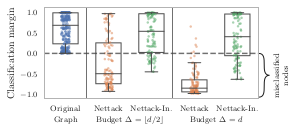

In [54]:
models = ['Nettack', 'Nettack-In.', 'Original']
epsilons = [0.5, 1.0]
order = [models[2],
         models[0] + '_' + str(epsilons[0]),
         models[1] + '_' + str(epsilons[0]),
         models[0] + '_' + str(epsilons[1]),
         models[1] + '_' + str(epsilons[1])]

df_results['Model'] = df_results[df_results.epsilon.isin([0.5, 1])].apply(
    lambda row: (models[0] if row.direct else models[1]) + '_' + str(row.epsilon),
    axis=1
)
df_results['Model plain'] = df_results[df_results.epsilon.isin([0.5, 1])].direct.fillna(True).apply(
    lambda direct: models[0] if direct else models[1]
)

df_results_clean = df_results[df_results.direct].copy()
df_results_clean.margin = df_results_clean.initial_margin
df_results_clean['Model'] = models[2]
df_results_clean['Model plain'] = models[2]

df = pd.concat([df_results_clean, df_results], ignore_index=True)

for (dataset, attack), df_group in df.groupby(['dataset', 'attack']):
    print(dataset, attack)
    
    df_group[architecture_c] = df_group['label']
    
    print(df_group.groupby(architecture_c).epsilon.count())
            
    fig, ax = mpl_latex.newfig(width=0.7, ratio_yx=0.4375, rcParams={
        'grid.color': 'k', 'text.color': 'k', 'xtick.color': 'k', 'ytick.color': 'k', 'axes.labelcolor': 'k'#, 'axes.edgecolor': 'k'
    })
    
    plt.axhline(0, linestyle='--', color='0.25', linewidth = 1.5, alpha=0.75) # color=matplotlib.rcParams['grid.color'], 
    
    plt.axvline(0.5, linestyle='-', color='0.25', linewidth = 0.75, alpha=0.75)
    plt.axvline(2.5, linestyle='-', color='0.25', linewidth = 0.75, alpha=0.75)
    
    sns.stripplot(
        x=df_group.Model,
        y=df_group.margin,
        #hue=df_group.Model,
        hue=df_group['Model plain'],
        #color='w',
        #linewidth=1,
        size=2.5,
        alpha=0.5,
        zorder=1,
        order=order
    )
    
    sns.boxplot(
        x=df_group.Model,
        y=df_group.margin,
        hue=df_group[architecture_c],
        fliersize=0,
        zorder=10,
        order=order,
        width=0.6
    )
    for patch in ax.artists:
        patch.set_facecolor((1, 1, 1))
        
    
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

    plt.yticks([-1, -0.5, 0, 0.5, 1])
    
    plt.xticks(plt.xticks()[0], [tick._text.split('_')[0] for tick in plt.xticks()[1]])
    plt.text(0, -1.55, r'Graph', fontsize=8, ha='center', va='top')
    plt.text(1.5, -1.55, r'Budget $\Delta = \lfloor d/2 \rfloor$', fontsize=8, ha='center', va='top')
    plt.text(3.5, -1.55, r'Budget $\Delta = d$', fontsize=8, ha='center', va='top')
    plt.xlabel('')
    plt.grid(False)
    plt.ylabel(margin_c)
    
    w, h = 0.25, 1.075
    brace = CurlyBrace(x=4.5, y=-1.075, width=w, height=h, lw=1, curliness=0.5, pointing='right', color=matplotlib.rcParams['text.color'], clip_on=False)
    ax.add_artist(brace)
    
    #plt.annotate(r"\}",fontsize=250, xy=(0.88, 0.35), xycoords='figure fraction')
    plt.annotate('misclassified\nnodes', fontsize=8, xy=(0.965, 0.265), xycoords='figure fraction', rotation='vertical', ha='center', color=matplotlib.rcParams['text.color'])
    fig.savefig(f'gnnbook_{attack}_{dataset}_boxplmargin.pdf', dpi=300, bbox_inches='tight')
   
plt.gcf()